Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 6: Vrednovanje klasifikatora i grupiranje

(c) 2015-2017 Domagoj Alagić, Mladen Karan, Jan Šnajder

<i>Verzija: 0.1</i> <br/>
<i>Zadnji put ažurirano: 12. siječnja 2017.</i> 

Objavljeno: **12. siječnja 2017.**<br>
Rok za predaju: U terminu vježbe u tjednu od **16. siječnja 2017.**

### Upute

Šesta laboratorijska vježba sastoji se od **pet** zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [5]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 1. Matrice zabune i evaluacijske mjere

Cilj ovog zadatka jest upoznati se s osnovnim evaluacijskim mjerama temeljenima na matrici zabune (engl. *confusion matrix*).

Preuzmite Glass Identification Data Set, koji opisuje rezultate kemijske analize 214 stakala. Riječ je o klasifikacijskom problemu sa šest klasa: na temelju 9 kemijskih značajki stakla potrebno je, u svrhu forenzičke analize, odrediti o kojoj se od šest vrsta stakla radi. Skup podataka možete učitati na sljedeći način:

In [2]:
data = np.loadtxt("./glass.csv", delimiter=',')
glass_X, glass_y = data[:,1:10], data[:,10]

Podijelite skup primjera na skup za učenje i na skup za ispitivanju u omjeru 1:1 (koristite funkciju [`model_selection train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Naučite SVM s linearnom jezgrom (s pretpostavljenim hiperparametrima) na skupu za učenje.

In [136]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

# Vaš kôd ovdje...
X_train, X_test, y_train, y_test = train_test_split(glass_X, glass_y, test_size=0.5, random_state=42)
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### (a)

Upoznajte se s funkcijom [`metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) koja iz stvarnih oznaka i predikcija računa matricu zabune. Izračunajte matricu zabune za naučeni model SVM-a predstavljenog gore.


Confusion matrix, without normalization
[[31  4  0  0  0  0]
 [18 23  0  1  0  0]
 [ 5  1  0  0  0  0]
 [ 0  4  0  3  0  0]
 [ 1  4  0  0  0  0]
 [ 1  0  0  0  0 11]]


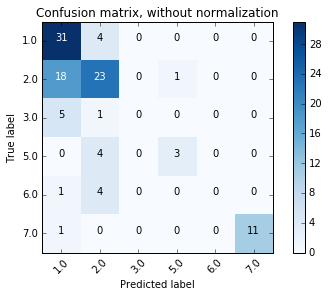

In [10]:
from sklearn.metrics import confusion_matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Vaš kôd ovdje...
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, model.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(set(y_test)),
                      title='Confusion matrix, without normalization')

**Q:** Koja klasa ima najviše pogrešnih pozitivnih klasifikacija (engl. *false positives*), a koja najviše pogrešnih negativnih klasifikacija (engl. *false negatives*)? <br>
**Q:** Što predstavljaju vrijednosti na dijagonali ove matrice?

#### (b)

Definirajte funkciju `twoway_confusion_matrix(cm, i)` koja prima matricu zabune `cm` dimenzija $K\times K$ (pri čemu je $K$ broj klasa) i indeks klase $i$ te izračunava binarnu matricu zabune za klasu $i$ kao pozitivnu klasu. Izračunajte i ispišite binarne matrice zabune za svih 6 klasa iz skupa `glass`.

In [16]:
# Vaš kôd ovdje...
def twoway_confusion_matrix(cm, i):
    tp = cm[i][i]
    fn = sum(cm, axis=1)[i] - tp
    fp = sum(cm, axis=0)[i] - tp
    tn = cm.sum() - tp - fn - fp
    return sp.array([[tp, fn], [fp, tn]])

for i in range(6):
    print('Binarna transformacija zabune i = {}'.format(i+1))
    print(twoway_confusion_matrix(cnf_matrix, i))

Binarna transformacija zabune i = 1
[[31  4]
 [25 47]]
Binarna transformacija zabune i = 2
[[23 19]
 [13 52]]
Binarna transformacija zabune i = 3
[[  0   6]
 [  0 101]]
Binarna transformacija zabune i = 4
[[ 3  4]
 [ 1 99]]
Binarna transformacija zabune i = 5
[[  0   5]
 [  0 102]]
Binarna transformacija zabune i = 6
[[11  1]
 [ 0 95]]


#### (c)

Pomoću funkcija iz (a) i (b) dijela zadatka, definirajte funkcije `accuracy`, `precision`, `recall` i `f1` za izračun točnosti, preciznosti, odziva odnosno F1-mjere. Svaka od ovih funkcija uzima kao argumente stvarne oznake primjera `y_true` i predviđene oznake `y_pred`. Funkcije trebaju izračunavati mikro i makro varijante ovih mjera, što se određuje opcijom `averaging=micro` odnosno `averaging=macro` (podrazumijevana vrijednost).

Izračunajte vrijednosti ovih evaluacijskih mjera na skupu `glass`. Uvjerite da vaša implementacija daje identične rezultate kao funkcije iz paketa [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Ove funkcije pretpostavljaju makro-mjere, osim one za F1 koja može primiti i parametar koji definira hoće li se izračunati mikro ili makro vrijednost.

In [91]:
# Vaš kôd ovdje...
#accuracy
def accuracy(y_true, y_pred, averaging='micro'):
    cm = confusion_matrix(y_true, y_pred)
    set_class = list(set(y_true))
    
    if averaging == 'macro':
        tp_tn = 0
        for i in range(len(set_class)): # idem po svim retcima
            tp_tn += cm[i][i]
        return (1.0 * tp_tn)/np.sum(cm)
    
    if averaging == 'micro':
        [[tp_m, fn_m], [fp_m, tn_m]] = [[0,0],[0,0]]
        for i in range(len(set_class)): # idem po svim retcima
            [[tp, fn], [fp, tn]] = twoway_confusion_matrix(cm, i)
            tp_m += tp 
            fn_m += fn 
            fp_m += fp 
            tn_m += tn
        return ((1.0*tp_m + tn_m) / (tp_m + tn_m + fp_m + fn_m))
    
def precision(y_true, y_pred, averaging='micro'):
    cm = confusion_matrix(y_true, y_pred)
    set_class = list(set(y_true))
    
    if averaging == 'macro':
        acc_list = []
        for i in range(len(set_class)): # idem po svim retcima
            [[tp, fn], [fp, tn]] = twoway_confusion_matrix(cm, i)
            if tp==0:
                acc_list.append(0)
                continue
            acc_list.append((1.0*tp) / (tp + fp))
        return average(acc_list)
    
    if averaging == 'micro':
        [[tp_m, fn_m], [fp_m, tn_m]] = [[0,0],[0,0]]
        for i in range(len(set_class)): # idem po svim retcima
            [[tp, fn], [fp, tn]] = twoway_confusion_matrix(cm, i)
            tp_m += tp 
            fn_m += fn 
            fp_m += fp 
            tn_m += tn
        return ((1.0*tp_m) / (tp_m + fp_m))
    
def recall(y_true, y_pred, averaging='micro'):
    cm = confusion_matrix(y_true, y_pred)
    set_class = list(set(y_true))
    
    if averaging == 'macro':
        acc_list = []
        for i in range(len(set_class)): # idem po svim retcima
            [[tp, fn], [fp, tn]] = twoway_confusion_matrix(cm, i)
            acc_list.append((1.0*tp) / (tp + fn))
        return average(acc_list)
    
    if averaging == 'micro':
        [[tp_m, fn_m], [fp_m, tn_m]] = [[0,0],[0,0]]
        for i in range(len(set_class)): # idem po svim retcima
            [[tp, fn], [fp, tn]] = twoway_confusion_matrix(cm, i)
            tp_m += tp 
            fn_m += fn 
            fp_m += fp 
            tn_m += tn
        return ((1.0*tp_m) / (tp_m + fn_m))
    
def f1(y_true, y_pred, averaging='micro'):
    cm = confusion_matrix(y_true, y_pred)
    set_class = list(set(y_true))
    
    if averaging == 'macro':
        acc_list = []
        for i in range(len(set_class)): # idem po svim retcima
            [[tp, fn], [fp, tn]] = twoway_confusion_matrix(cm, i)
            acc_list.append(2.*tp / (2*tp + fp + fn))
        return average(acc_list)
    
    if averaging == 'micro':
        [[tp_m, fn_m], [fp_m, tn_m]] = [[0,0],[0,0]]
        for i in range(len(set_class)): # idem po svim retcima
            [[tp, fn], [fp, tn]] = twoway_confusion_matrix(cm, i)
            tp_m += tp 
            fn_m += fn 
            fp_m += fp 
            tn_m += tn
        return (2.*tp_m / (2*tp_m + fp_m + fn_m))
    

In [92]:

from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score

print('Accuracy')
print('realizirana: \t', accuracy(y_test, model.predict(X_test), averaging='macro'))
print('iz metrics-a: \t', accuracy_score(y_test, model.predict(X_test)))
print('razlika: \t', (accuracy(y_test, model.predict(X_test), averaging='macro') - accuracy_score(y_test, model.predict(X_test))))
print('\n')

print('Precision')
print('realizirana: \t', precision(y_test, model.predict(X_test), averaging='macro'))
print('iz metrics-a: \t', precision_score(y_test, model.predict(X_test), average='macro'))
print('razlika: \t', (precision(y_test, model.predict(X_test), averaging='macro') - precision_score(y_test, model.predict(X_test), average='macro')))
print('\n')

print('Recall')
print('realizirana: \t', recall(y_test, model.predict(X_test), averaging='macro'))
print('iz metrics-a: \t', recall_score(y_test, model.predict(X_test), average='macro'))
print('razlika: \t', (recall(y_test, model.predict(X_test), averaging='macro') - recall_score(y_test, model.predict(X_test), average='macro')))
print('\n')

for mode in ['micro', 'macro']:
    print('F1 - ',mode)
    print('realizirana: \t', f1(y_test, model.predict(X_test), mode))
    print('iz metrics-a: \t', f1_score(y_test, model.predict(X_test), average=mode))
    print('razlika: \t', (f1(y_test, model.predict(X_test), mode) - f1_score(y_test, model.predict(X_test), average=mode)))

Accuracy
('realizirana: \t', 0.6355140186915887)
('iz metrics-a: \t', 0.63551401869158874)
('razlika: \t', 0.0)


Precision
('realizirana: \t', 0.49041005291005285)
('iz metrics-a: \t', 0.49041005291005285)
('razlika: \t', 0.0)


Recall
('realizirana: \t', 0.46309523809523806)
('iz metrics-a: \t', 0.46309523809523806)
('razlika: \t', 0.0)


('F1 - ', 'micro')
('realizirana: \t', 0.6355140186915887)
('iz metrics-a: \t', 0.63551401869158874)
('razlika: \t', 0.0)
('F1 - ', 'macro')
('realizirana: \t', 0.46217309260787526)
('iz metrics-a: \t', 0.46217309260787526)
('razlika: \t', 0.0)


/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Q:** Koja je razlika između mikro- i makro-procjene?

### 2. Vrednovanje klasifikatora

Kako bismo se uvjerili koliko naš naučeni model zapravo dobro radi, nužno je provesti evaluaciju modela. Ovaj korak od presudne je važnosti u svim primjenama strojnog učenja, pa je stoga bitno znati provesti evaluaciju na ispravan način. U ovom zadatku fokusirat ćemo se na k-struku ugniježđenu unakrsnu provjeru.

#### (a)

Implementirajte funkciju `nested_kfold_cv(clf, param_grid, X, y, k1, k2)` koja provodi k-struku ugniježđenu unakrsnu provjeru. Argument `clf` predstavlja vaš klasifikator (nenaučena instanca), `param_grid` rječnik hiperparametara i njihovih vrijednosti koje se isprobavaju u učenju, `X` i `y` označeni skup podataka, a `k1` i `k2` broj preklopa u vanjskoj, odnosno unutarnjoj petlji. Međutim, unutarnju petlju možete izvesti korištenjem razreda [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Upoznajte se sa spomenutim razredom. Za vanjsku petlju, poslužite se razredom [`model_selection.KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) koji zna kako raditi preklope iz danih mu podataka. Proučite kako se mora definirati rječnik vrijednosti hiperparametara (treba se držati posebnog načina imenovanja varijabli) na http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py.

Funkcija vraća listu generalizacijskih pogrešaka kroz preklope vanjske petlje.

In [226]:
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV

def nested_kfold_cv(clf, param_grid, X, y, k1=10, k2=3):
    # Vaš kôd ovdje...
    gener_pogreske = []
    np.random.seed(seed=42)
    for i in range(k1):
        kfold = KFold(X.shape[0],n_folds=k2,shuffle=True, random_state=np.random.randint(0,4294967295))
        for train, test in kfold:
            x_train, x_test = X[train], X[test]
            y_train, y_test = y[train], y[test]
            model = GridSearchCV(clf, param_grid)
            model.fit(x_train,y_train)
            gener_pogreske.append(accuracy_score(y_test,model.predict(x_test)))
    return gener_pogreske

**Q:** Zašto nam treba još jedna razina k-struke provjere?

#### (b)

Dodatno, vrijedi znati kako iskoristiti `GridSearchCV` u slučaju da moramo raditi i pretprocesiranje podataka. Stoga se i upoznajte s razredom [`pipeline.Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), koji omogućava jednostavno stvaranje cjevovoda modela (bilo za pretprocesiranje ili za klasifikaciju/regresiju/itd.) koji se kasnije može koristiti kao bilo koji drugi model (jedan objekt s `fit` i `predict` funkcijama).

Pripremite cjevovod koji se sastoji od [standardnog skaliranja](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) i SVM-a s RBF-jezgrom.

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Vaš kôd ovdje...
clf = SVC()
pipeline_clf = Pipeline([('StandardScaler', StandardScaler()), ('svc', clf)])
pipeline_clf.get_params().keys()

['svc__class_weight',
 'StandardScaler__with_mean',
 'svc__shrinking',
 'svc__cache_size',
 'svc__C',
 'StandardScaler__copy',
 'svc__decision_function_shape',
 'svc__degree',
 'svc__kernel',
 'svc',
 'svc__verbose',
 'svc__probability',
 'svc__gamma',
 'svc__coef0',
 'steps',
 'svc__max_iter',
 'svc__tol',
 'StandardScaler__with_std',
 'StandardScaler',
 'svc__random_state']

#### (c)

Naučite vaš cjevovod na `glass` skupu podataka koristeći k-struku ugniježđenu unakrsnu provjeru (korištenjem Vaše funkcije s pretpostavljenim vrijednostima za `k1` i `k2`). Trebate isprobati hiperparametre $C\in\{2^{-3},2^{-4},\dots,2^{3}\}$ i $\gamma\in\{2^{-3},2^{-4},\dots,2^{3}\}$. Ispišite srednju vrijednost generalizacijske pogreške.

In [175]:
# Vaš kôd ovdje...
params = [{'svc__kernel': ['rbf'], 'svc__gamma': [2e-3,2e-2,2e-1,2,20,200,2000],
                     'svc__C': [2e-3,2e-2,2e-1,2,20,200,2000]}]

data = np.loadtxt("./glass.csv", delimiter=',')
glass_X, glass_y = data[:,1:10], data[:,10]

pogreske = nested_kfold_cv(pipeline_clf,params, glass_X, glass_y)
print "Srednja vrijednost generalizacijske pogreske = %s" %(mean(pogreske))

Srednja vrijednost generalizacijske pogreske = 0.676591027647


### 3. Statističko testiranje

Scenarij koji nas najviše zanima jest usporedba dvaju klasifikatora, odnosno, je li jedan od njih zaista bolji od drugog. Jedini način kako to možemo zaista potvrditi jest statističkom testom, u našem slučaju **uparenim t-testom**. Njime ćemo se baviti u ovom zadatku.

#### (a)

U ovom zadatku bavit ćemo se testiranjem je li razlika u perfomansama dva klasifikatora statistički značajna. Nad našim skupom podataka proveli smo unakrsnu provjeru s $N \in \{5, 10, 50\}$ preklopa. Kao rezultat dobili smo tri skupa rezultata (po jedan za svaku vrijednost $N$) u kojima imamo uparene perfomanse za oba klasifikatora kroz preklope.

In [177]:
np.random.seed(1337)
C1_scores_5folds = np.random.normal(78, 4, 5)
C2_scores_5folds = np.random.normal(81, 2, 5)

C1_scores_10folds = np.random.normal(78, 4, 10)
C2_scores_10folds = np.random.normal(81, 2, 10)

C1_scores_50folds = np.random.normal(78, 4, 50)
C2_scores_50folds = np.random.normal(81, 2, 50)

#### (b)

Iskoristite ugrađenu funkciju [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html) za provedbu uparenog t-testa nad podatcima s $N=10$ preklopa.

In [179]:
# Vaš kôd ovdje...
from scipy.stats import ttest_rel

print ttest_rel(C1_scores_10folds,C2_scores_10folds)

Ttest_relResult(statistic=-0.8842099536936594, pvalue=0.3995873733387435)


#### (c)

Zatim sami implementirajte funkciju `paired_t_test` koja provodi upareni t-test. Funkcija prima dvije liste vrijednosti, a  vraća dvije vrijednosti: iznos t-statistike i p-vrijednost. Za računanje p-vrijednosti uzmite u obzir da t-statistika ima studentovu razdiobu s $N-1$ stupnjeva slobode. Kao što znate, p-vrijednost jest zapravo $P(x < -t) + P(x > t)$, gdje $t$ označava apsolutni iznos t-statistike. Do ovih vjerojatnosti možete doći preko funkcija `scipy.stats.t.cdf` ili `scipy.stats.t.sf` iz paketa [`scipy.stats.t`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html). Usporedite vlastitu implementaciju s onom ugrađenom.

In [240]:
from scipy.stats import t as t_stat

def paired_t_test(data1, data2):
    # Vaš kôd ovdje...
    np_dat1 = np.array(data1)
    np_dat2 = np.array(data2)
    
    diff = np_dat1-np_dat2
    N = diff.shape[0]
    mi = mean(diff)
    
    suma = sum([(x - mi)**2 for x in diff])
    sigma = np.sqrt((1.*suma) / (N-1))
    
    t_val = (1. * mi)/((1.*sigma)/np.sqrt(N))
    return t_val,t_stat.sf(np.abs(t_val),N-1)*2

tval, pval = paired_t_test(C1_scores_10folds,C2_scores_10folds)
print "T value = %s and P value = %s" %(tval,pval)

T value = -0.884209953694 and P value = 0.399587373339


**Q:** Koju hipotezu $H_0$ i alternativnu hipotezu $H_1$ testiramo ovim testom? <br>
**Q:** Ako odaberemo razinu značajnosti $\alpha = 0.05$, hoćemo li odbaciti hipotezu $H_0$? <br>
**Q:** Koja pretpostavka na vjerojatnosnu razdiobu primjera je napravljena u gornjem testu? Je li ona opravdana?

#### (d) 

Ponovite prethodni zadatak na skupovima podataka s 5 i 50 foldova. Razmotrite kako broj preklopa (primjera u našem uzorku) utječe na rezultat testiranja.

In [218]:
# Vaš kôd ovdje...
print ttest_rel(C1_scores_5folds,C2_scores_5folds)
print ttest_rel(C1_scores_50folds,C2_scores_50folds)

Ttest_relResult(statistic=-1.9936398023627793, pvalue=0.11696313548164915)
Ttest_relResult(statistic=-5.8240553160508179, pvalue=4.3638376885602463e-07)


#### (e)

Završno, naučite model logističke regresije (bez preslikavanja značajki u višu dimenziju) sa standardnim skaliranjem na način jednak onom u zadatku 1c. Isprobajte razine regularizacije $C\in\{2^{-3},2^{-4},\dots,2^{3}\}$. Nakon toga imat ćete po 10 točnosti za svaki od preklopa za svaki od dva modela (LR i SVM). Provedite upareni t-test i kažite razlikuju li se performanse ova dva modela s razinom značajnosti $\alpha = 0.05$.

In [227]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje...

clf = SVC()
pipeline_clf = Pipeline([('StandardScaler', StandardScaler()), ('svc', clf)])
pipeline_clf.get_params().keys()

params = [{'svc__kernel': ['rbf'], 'svc__gamma': [2e-3,2e-2,2e-1,2,20,200,2000],
                     'svc__C': [2e-3,2e-2,2e-1,2,20,200,2000]}]

data = np.loadtxt("./glass.csv", delimiter=',')
glass_X, glass_y = data[:,1:10], data[:,10]

pogreske1 = nested_kfold_cv(pipeline_clf,params, glass_X, glass_y)
print "SVC Srednja vrijednost generalizacijske pogreske = %s" %(mean(pogreske1))


clf = LogisticRegression()
pipeline_clf = Pipeline([('StandardScaler', StandardScaler()), ('log_reg', clf)])
pipeline_clf.get_params().keys()

params = [{'log_reg__C': [2e-3,2e-2,2e-1,2,20,200,2000]}]

pogreske2 = nested_kfold_cv(pipeline_clf,params, glass_X, glass_y)
print "Log_reg Srednja vrijednost generalizacijske pogreske = %s" %(mean(pogreske2))

SVC Srednja vrijednost generalizacijske pogreske = 0.679975221701
Log_reg Srednja vrijednost generalizacijske pogreske = 0.629760041732


In [229]:
tval, pval = paired_t_test(pogreske1,pogreske2)
print "T value = %s and P value = %s" %(tval,pval)
ttest_rel(pogreske1,pogreske2)

T value = 4.50897212973 and P value = 1.9999009519


Ttest_relResult(statistic=4.5089721297267049, pvalue=9.9048100135300338e-05)

**Q:** Koji je model u konačnici bolji i je li ta prednost značajna uz $\alpha = 0.05$?

### 4. Algoritam k-srednjih vrijednosti

#### (a)
Za početak, implementirajte algoritam k-srednjih vrijednosti nadopunjući donji predložak razreda ``DIYKMeans``. Konstruktor razreda prima početne centroide grupa (``init_centroids``), broj grupa $K$ (``num_clusters``) i maksimalan broj iteracija algoritma (``max_iter``). Nadalje, nadopunite funkciju ``fit(X)`` koja provodi učenje grupiranja iz danih podataka ``X``, te funkciju ``predict(X)`` koja predviđa grupu danih podataka ``X``. Algoritam se provodi dok se ne dosegne ``max_iter`` iteracija ili dok razlika između $J$ dviju iteracija ne padne ispod `tol`. Pripremite skup podataka po volji i ručno provedite algoritam te usporedite izlaze Vaše implementacije modela (završni centroidi, predikcije, itd.).

**NB**: Pripazite na tip podataka ulaznih primjera. Ako su ulazni podaci vektori cijelih brojeva, računanje njihove srednje vrijednosti može *opet* rezultirati cjelobrojnim srednjim vrijednostima. Tip podataka možete eksplicitno definirati pri stvaranju numPy-polja, o čemu možete pročitati [ovdje](https://docs.scipy.org/doc/numpy/user/basics.types.html).

prekinuto treniranje


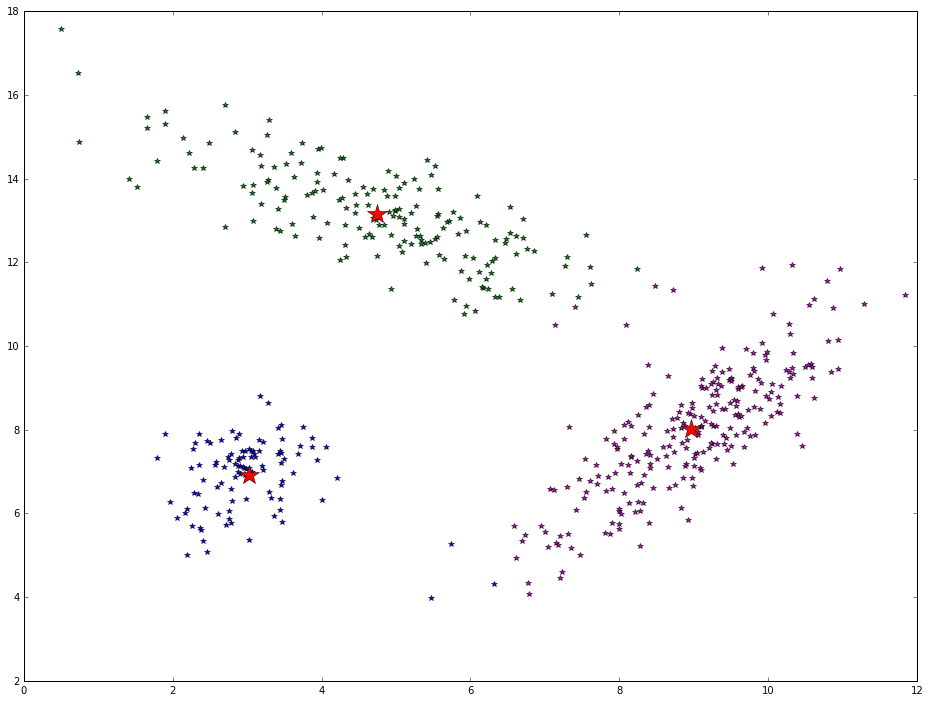

In [56]:
from copy import deepcopy
from collections import defaultdict
import numpy as np

class DIYKMeans(object):
    
    def __init__(self, init_centroids, num_clusters=3, max_iter=300, tol=0.001):
        
        if init_centroids is None or init_centroids.shape[0] != num_clusters:
            raise Exception("Exactly `num_clusters` of initial centroids must be provided.")
        
        self.num_clusters = num_clusters
        self.centroids = deepcopy(init_centroids)
        self.max_iter = max_iter
        self.tol = tol
        
        
    def fit(self, X):
        # Vaš kôd ovdje...
        prev_distance = float('inf')
        for i in range(self.max_iter):
            # Cluster Assignment step
            distances = np.array([np.array([np.dot(x_i-y_k, x_i-y_k) for y_k in self.centroids]) for x_i in X])
            C = np.argmin(distances,1)
            # Move centroids step
            self.centroids = [X[C == k].mean(axis = 0) for k in range(self.num_clusters)]
            
            current_distance = np.sum(distances)
            if(np.abs(prev_distance-current_distance) < self.tol):
                print "prekinuto treniranje"
                break
            else:
                prev_distance = current_distance
        pass
    
    def predict(self, X):
        
        # Vaš kôd ovdje...
        distances = [np.array([np.dot(x_i-y_k, x_i-y_k) for y_k in self.centroids]) for x_i in X]
        C = np.argmin(distances,1)
        return C

def show(X, C, centroids):
    plt.figure(figsize=(16,12))
    plt.cla()
    plt.plot(X[C == 0, 0], X[C == 0, 1], '*b',
         X[C == 1, 0], X[C == 1, 1], '*m',
         X[C == 2, 0], X[C == 2, 1], '*g')
    cents = deepcopy(centroids)
    cents = np.reshape(cents,(-1,2))
    plt.plot(cents[:,0],cents[:,1],'*r',markersize=20)
    plt.show()
        
m1, cov1 = [9, 8], [[1.5, 2], [1, 2]]
m2, cov2 = [5, 13], [[2.5, -1.5], [-1.5, 1.5]]
m3, cov3 = [3, 7], [[0.25, 0.5], [-0.1, 0.5]]
data1 = np.random.multivariate_normal(m1, cov1, 250)
data2 = np.random.multivariate_normal(m2, cov2, 180)
data3 = np.random.multivariate_normal(m3, cov3, 100)
X = np.vstack((data1,np.vstack((data2,data3))))
np.random.shuffle(X)

clusters = 3
init_centroids = X[np.random.choice(np.arange(len(X)), clusters), :]

model = DIYKMeans(init_centroids, num_clusters = clusters)
model.fit(X)
show(X, model.predict(X), model.centroids)

#### (b)

Kao što možete pretpostaviti, najveći problem ovog algoritma je to što unaprijed zahtjeva broj grupa u koje će grupirati podatke. Ta informacija nam često nije dostupna (kao što nam nisu dostupne ni oznake primjera) te je stoga potrebno nekako izabrati najbolju vrijednost hiperparametra $K$. Jedan od naivnijih pristupa jest **metoda lakta/koljena** (engl. *elbow method*) koja se temelji na tome da se izabere ona vrijednost hiperparametra $K$ za koju se dogodi nagla promjena kriterijske funkcije algoritma k-srednjih vrijednosti $J$. Iz laičke perspektive, uzima se onaj $K$ za koji se na krivulji od $J$ s obzirom na $K$ pojavi "lakat". 

Sada ćemo se, kao i inače, prebaciti na ugrađenu implementaciju algoritma k-srednjih vrijednosti, dostupnoj u [`cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Iskoristite skup podataka `Xp` dan niže. Isprobajte vrijednosti hiperparametra $K$ iz $[0,1,\ldots,15]$. Ne trebate dirati nikakve hiperparametre modela osim $K$. Iscrtajte krivulju od $J$ u ovisnosti o broju grupa $K$.

**NB**: Kriterijska funkcija algoritma k-srednjih vrijednosti još se i naziva **inercijom** (engl. *inertia*). Za naučeni model, vrijednost kriterijske funkcije $J$ dostupna je kroz razredni atribut `inertia_`.

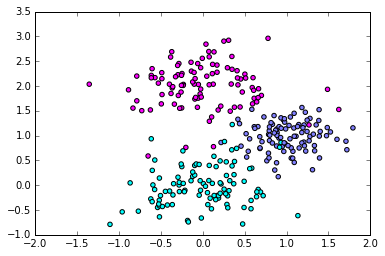

In [89]:
from sklearn.datasets import make_blobs

Xp, yp = make_blobs(n_samples=300, n_features=2, centers=[[0, 0], [1.0, 1.0], [0, 2]], 
                    cluster_std=[0.45, 0.3, 0.45], random_state=96)
plt.scatter(Xp[:,0], Xp[:,1], c=yp, cmap=plt.get_cmap("cool"), s=20)

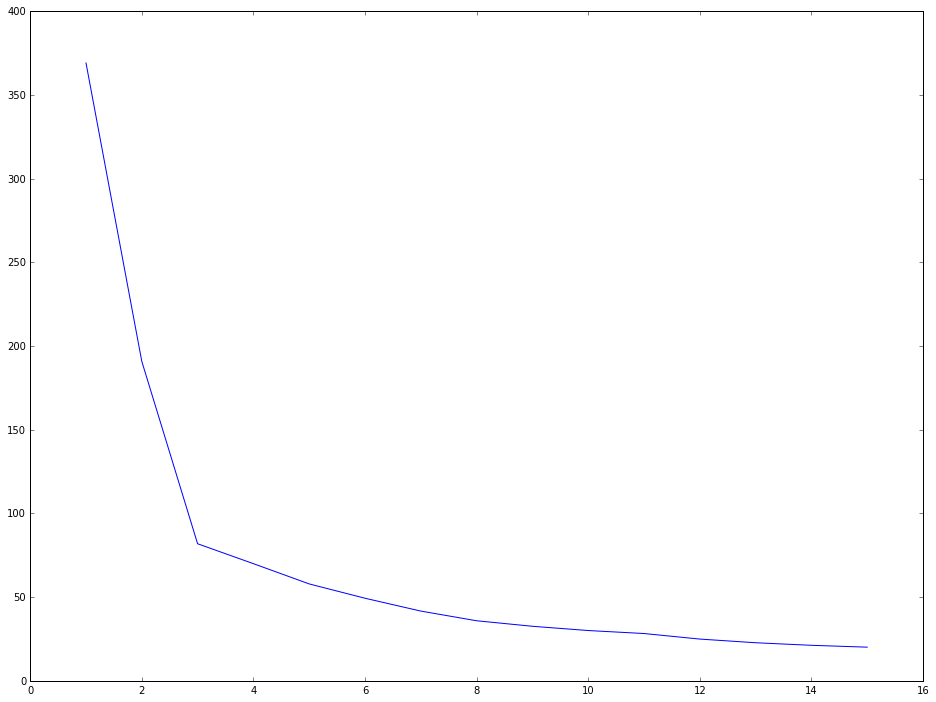

In [90]:
from sklearn.cluster import KMeans

# Vaš kôd ovdje...
model = KMeans(n_clusters = 3)
model.fit(Xp,yp)
dist = []
for k in range(1,16):
    model = KMeans(n_clusters = k)
    model.fit(Xp,yp)
    dist.append(model.inertia_)
plt.figure(figsize=(16,12))
plt.plot(range(1,16),dist)
plt.show()

**Q:** Koju biste vrijednost hiperparametra $K$ izabrali na temelju ovog grafa? Zašto? <br>
**Q:** Je li ova metoda robusna? <br>
**Q:** Znate li još koji način kako izabrati vrijednost hiperparametra $K$? <br>
**Q:** Možemo li izabrati onaj $K$ koji minimizira pogrešku $J$? Objasnite.

#### (c)

Kako evaluirati točnost modela grupiranja ako imamo stvarne oznake svih primjera (a u našem slučaju imamo, jer smo mi ti koji smo generirali podatke)? Često korištena mjera jest **Randov indeks** koji je zapravo pandan točnosti u zadatcima klasifikacije. Implementirajte funkciju `rand_index_score(y_gold, y_predict)` koja ga računa. Funkcija prima dva argumenta: listu stvarnih grupa kojima primjeri pripadaju (`y_gold`) i listu predviđenih grupa (`y_predict`).

In [98]:
from scipy.misc import comb

def myComb(a,b):
    return comb(a,b,exact=True)

vComb = np.vectorize(myComb)

def rand_index_score(y_gold, y_predict):
    n = len(set(y_gold))
    contingency_matrix = np.bincount(n * (y_gold) + (y_predict), minlength=n*n).reshape(n, n)
    #row je ground truth, column je pred
    
    tp_plus_fp = vComb(contingency_matrix.sum(0, dtype=int),2).sum()
    tp_plus_fn = vComb(contingency_matrix.sum(1, dtype=int),2).sum()
    tp = vComb(contingency_matrix.astype(int), 2).sum()
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(contingency_matrix.sum(), 2) - tp - fp - fn
    
    
    return float(tp + tn) / (tp + fp + fn + tn)
    

ytr = np.array([1,2,3,2,3,3,2,2,1,1,1,0])
yprd = np.array([1,1,3,1,1,2,3,2,1,1,1,0])
n=4
print np.bincount(n * (ytr ) + (yprd), minlength=n*n).reshape(n, n)
print rand_index_score(ytr,yprd)

[[1 0 0 0]
 [0 4 0 0]
 [0 2 1 1]
 [0 1 1 1]]
0.636363636364


Zatim evaluirajte gornji model (onaj s najboljim $K$) na podatcima `Xp` (efektivno skup za učenje) koristeći Randov indeks.

In [99]:
# Vaš kôd ovdje...
model = KMeans(n_clusters = 3)
model.fit(Xp,yp)
rand_index_score(yp,model.predict(Xp))

0.93919732441471571

**Q:** Kako biste svojim riječima opisali što mjeri Randov indeks? <br>
**Q:** Koji su glavni problemi ove metrike?

### 5. Pretpostavke algoritma k-srednjih vrijednosti

U ovom i sljedećim podzadatcima fokusirat ćemo se na temeljne pretpostavke algoritma k-srednjih vrijednosti te što se događa ako te pretpostavke nisu zadovoljene.

#### (a)

Prvo, krenite od podataka `X1`, koji su generirani korištenjem funkcije [`datasets.make_blobs`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), koja stvara grupe podataka pomoću izotropskih Gaussovih distribucija.

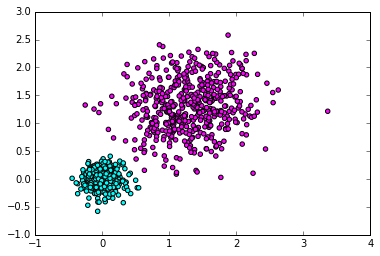

In [84]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0], [1.3, 1.3]], cluster_std=[0.15, 0.5], random_state=96)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.get_cmap("cool"), s=20)


Naučite model k-srednjih vrijednosti (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

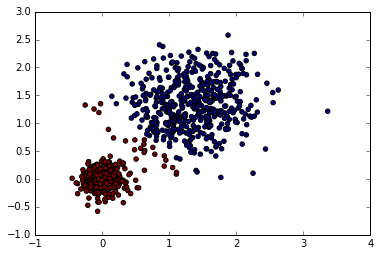

In [87]:
# Vaš kôd ovdje...
kmean = KMeans(n_clusters=2)
kmean.fit(X1,y1)
plt.scatter(X1[:,0],X1[:,1], c=kmean.predict(X1))
plt.show()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena? <br>
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (b)

Isprobajte algoritam k-srednjih vrijednosti na podatcima generiranim korištenjem funkcije [`datasets.make_circles`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), koja stvara dvije grupe podataka tako da je jedna unutar druge.

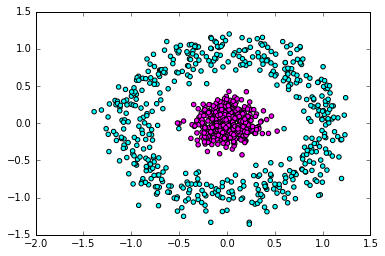

In [74]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(n_samples=1000, noise=0.15, factor=0.05, random_state=96)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.get_cmap("cool"), s=20)

Ponovno, naučite model k-srednjih vrijednosti (idealno pretpostavljajući $K=2$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

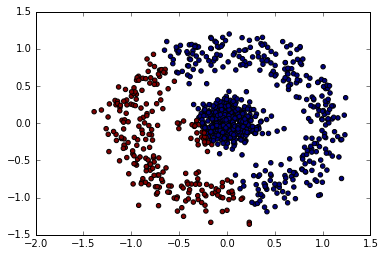

In [86]:
# Vaš kôd ovdje...
kmean = KMeans(n_clusters=2)
kmean.fit(X2,y2)
plt.scatter(X2[:,0],X2[:,1], c=kmean.predict(X2))
plt.show()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena? <br>
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (c)

Završno, isprobat ćemo algoritam na sljedećem umjetno stvorenom skupu podataka:

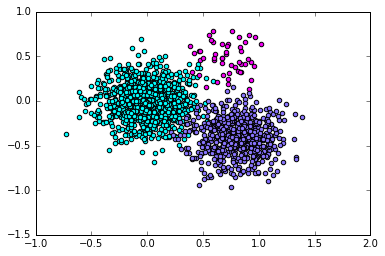

In [63]:
X31, y31 = make_blobs(n_samples=1000, n_features=2, centers=[[0, 0]], cluster_std=[0.2], random_state=69)
X32, y32 = make_blobs(n_samples=50, n_features=2, centers=[[0.7, 0.5]], cluster_std=[0.15], random_state=69)
X33, y33 = make_blobs(n_samples=600, n_features=2, centers=[[0.8, -0.4]], cluster_std=[0.2], random_state=69)
plt.scatter(X31[:,0], X31[:,1], c="#00FFFF", s=20)
plt.scatter(X32[:,0], X32[:,1], c="#F400F4", s=20)
plt.scatter(X33[:,0], X33[:,1], c="#8975FF", s=20)

# Just join all the groups in a single X.
X3 = np.vstack([X31, X32, X33])
y3 = np.hstack([y31, y32, y33])

Ponovno, naučite model k-srednjih vrijednosti (ovaj put idealno pretpostavljajući $K=3$) na gornjim podatcima i prikažite dobiveno grupiranje (proučite funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), posebice argument `c`).

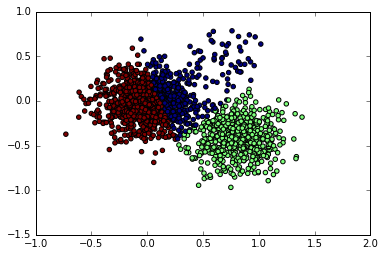

In [65]:
# Vaš kôd ovdje...
kmean = KMeans(n_clusters=3)
kmean.fit(X3,y3)
plt.scatter(X3[:,0],X3[:,1], c=kmean.predict(X3))
plt.show()

**Q:** Što se dogodilo? Koja je pretpostavka algoritma k-srednjih vrijednosti ovdje narušena? <br>
**Q:** Što biste morali osigurati kako bi algoritam pronašao ispravne grupe?

#### (d)

Sada kada ste se upoznali s ograničenjima algoritma k-srednjih vrijednosti, isprobat ćete grupiranje modelom mješavine Gaussa (*Gaussian Mixture Models; GMM*), koji je generalizacija algoritma k-srednjih vrijednosti (odnosno, algoritam k-srednjih vrijednosti specijalizacija je GMM-a). Implementacija ovog modela dostupna je u [`mixture.GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture). Isprobajte ovaj model (s istim pretpostavkama o broju grupa) na podacima iz podzadataka (a)-(c). Ne morate mijenjati nikakve hiperparametre ni postavke osim broja komponenti.

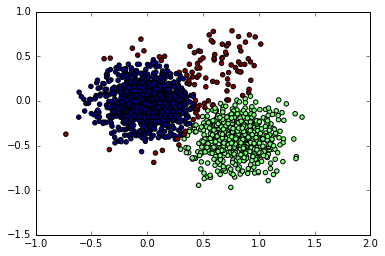

In [73]:
from sklearn.mixture import GMM

# Vaš kôd ovdje...# Vaš kôd ovdje...
kmean = GMM(n_components=3)
kmean.fit(X3,y3)
plt.scatter(X3[:,0],X3[:,1], c=kmean.predict(X3))
plt.show()

**Q:** Uspjeva li GMM riješiti "probleme" koje ima algoritam k-srednjih vrijednosti? Zašto?